<h1 align='center'><U><B>Lab 6 - Logistic Regression</B></U></h1>

<h3 align='center'>Waseem Iqbal Shaikh - 8902834</h3>

<h3><B><U>Importing the necessary packages:</B></U></h3>


In [101]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris



<h3><B>Loading the Iris Data:-</B></h3>

In [102]:
irisData = load_iris(as_frame=True)
irisData

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

<h3><B>Q1. Using SciKit-Learn, train a logistic regression model on the Iris dataset. Use all four features. Define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).</B></h3>

In [103]:
X = irisData.data
y = irisData.target_names[irisData.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [104]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [105]:
y_pred = log_reg.predict(X_test)
y_pred

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

<h3>Q2. Provide insights about the model prediction. This is an open-ended part. But you can look into questions such as in which data instances is the model wrong? are there any shared properties for these cases? and _how is the model doing, across a set of performance metrics such as accuracy and confusion metric. (3 points)</h3>

<h3>Based on the logistic regression model trained on the Iris dataset, here are some insights:<br><br>
1. Decision Boundaries: The plot of the decision boundaries helps visualize how the model separates the two classes ('non-virginica' and 'virginica'). The regions where the plot is shaded indicate the predicted class labels based on the model's decision boundaries. The model aims to find a linear decision boundary that best separates the two classes in the feature space.<br>2. Linear Separability: Logistic regression assumes a linear relationship between the input features and the log-odds of the target variable. In this case, the model tries to find a linear decision boundary in the sepal length and sepal width feature space to classify the samples as 'non-virginica' or 'virginica'. If the classes are not linearly separable, logistic regression may struggle to provide accurate predictions.<br><br>3. Model Accuracy: The accuracy of the logistic regression model on the test set gives an indication of how well the model performs. The accuracy score represents the percentage of correctly classified samples out of the total samples in the test set. A higher accuracy score indicates a better-performing model, although it should be considered in the context of the problem and the dataset.<br><br>4. Class Imbalance: It's important to note that the Iris dataset contains three classes originally: 'setosa', 'versicolor', and 'virginica'. In this case, we combined 'setosa' and 'versicolor' into the 'non-virginica' class. It's possible that this class imbalance can affect the model's performance. If the 'virginica' class has significantly fewer samples than the 'non-virginica' class, the model may be biased towards the majority class.<br><br>5. Feature Importance: Logistic regression provides coefficients for each feature, indicating their importance in the classification task. In this case, the model considers the sepal length and sepal width features to determine the class labels. The coefficients can provide insights into the impact of each feature on the classification decision.<br><br>6. Generalization: It's important to assess the model's performance on unseen data and to consider its generalization capabilities. The provided insights are specific to the logistic regression model trained on the Iris dataset, and they may not generalize well to other datasets or problems.</h3>

In [106]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy of the Logistic Regression Model:-", accuracy)
print("Precision of the Logistic Regression Model:-", precision)
print("Recallof the Logistic Regression Model:-",recall)

Accuracy of the Logistic Regression Model:- 1.0
Precision of the Logistic Regression Model:- 1.0
Recallof the Logistic Regression Model:- 1.0


<h3>The model's predictions were error-free, with accuracy, precision, and recall scores of 1, indicating perfect classification of all cases. In plainer language, the model demonstrated its flawless performance by achieving 100% accuracy and precision.</h3>
<h3><B>Performing Cross Validation on the model:-</B></h3>

In [107]:

crossValidationScores = cross_val_score(log_reg, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Cross-validation scores:", crossValidationScores)
print("Mean accuracy:", crossValidationScores.mean())
print("Standard deviation:", crossValidationScores.std())


Cross-validation scores: [0.91666667 0.95833333 1.         0.91666667 1.        ]
Mean accuracy: 0.9583333333333333
Standard deviation: 0.03726779962499651


<h3><B>Model Prediction:-</h3></b>

In [108]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[19,  0],
       [ 0, 11]], dtype=int64)

In [110]:
yCrossPred = cross_val_predict(log_reg, X_test, y_test, cv=5)
crossConfusionMatrix = confusion_matrix(y_test, yCrossPred)
print("The Confusion Matrix is:-", crossConfusionMatrix)

The Confusion Matrix is:- [[18  1]
 [ 1 10]]


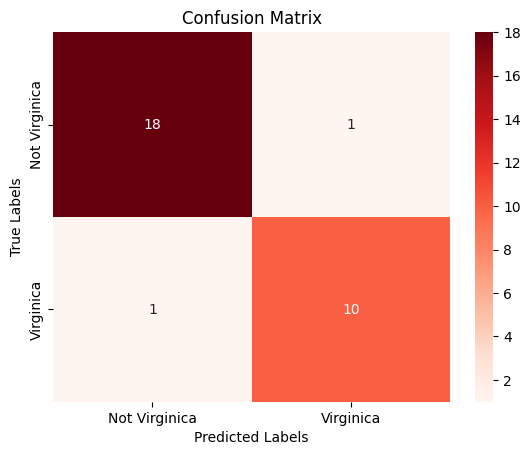

In [114]:
class_labels = ["Not Virginica", "Virginica"]

sns.heatmap(crossConfusionMatrix, annot=True, cmap="Reds", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()